In [1]:
from libra_toolbox.neutron_detection.activation_foils.calibration import (
    CheckSource,
    co60,
    cs137,
    mn54,
    na22,
)
from libra_toolbox.neutron_detection.activation_foils.compass import (
    Measurement,
    CheckSourceMeasurement,
)
from datetime import date

run_dir = "250317_BABY_1L_run3/DAQ"
uCi_to_Bq = 3.7e4

co60_checksource = CheckSource(
    co60, activity_date=date(2014, 3, 19), activity=0.872 * uCi_to_Bq
)
cs137_checksource = CheckSource(
    cs137, activity_date=date(2023, 9, 29), activity=9.38 * uCi_to_Bq
)
mn54_checksource = CheckSource(
    mn54, activity_date=date(2016, 5, 2), activity=6.27 * uCi_to_Bq
)
na22_checksource = CheckSource(
    na22, activity_date=date(2023, 9, 29), activity=9.98 * uCi_to_Bq
)

check_source_measurements = {
    "Co60_1": {
        "directory": f"{run_dir}/Co60_0_872uCi_19Mar2014_250318_run2/UNFILTERED",
        "check_source": co60_checksource,
    },
    "Co60_2": {
        "directory": f"{run_dir}/Co60_0_872uCi_19Mar2014_250319_run3/UNFILTERED",
        "check_source": co60_checksource,
    },
    "Co60_3": {
        "directory": f"{run_dir}/Co60_0_872uCi_19Mar2014_250320_run4/UNFILTERED",
        "check_source": co60_checksource,
    },
    "Co60_4": {
        "directory": f"{run_dir}/Co60_1_0uCi_Jan2006_250318/UNFILTERED",
        "check_source": CheckSource(
            co60, activity_date=date(2006, 1, 1), activity=1.0 * uCi_to_Bq
        ),
    },
    "Co60_5": {
        "directory": f"{run_dir}/Co60_1_0uCi_Feb2006_250320_run1/UNFILTERED",
        "check_source": CheckSource(
            co60, activity_date=date(2006, 2, 1), activity=1.0 * uCi_to_Bq
        ),
    },
    "Cs137_1": {
        "directory": f"{run_dir}/Cs137_4_66uCi_19Mar2014_250318/UNFILTERED",
        "check_source": CheckSource(
            cs137, activity_date=date(2014, 3, 19), activity=4.66 * uCi_to_Bq
        ),
    },
    "Cs137_2": {
        "directory": f"{run_dir}/Cs137_9_38uCi_29Sep2023_250318_run2/UNFILTERED",
        "check_source": cs137_checksource,
    },
    "Cs137_3": {
        "directory": f"{run_dir}/Cs137_9_38uCi_29Sep2023_250318_run3/UNFILTERED",
        "check_source": cs137_checksource,
    },
    "Cs137_4": {
        "directory": f"{run_dir}/Cs137_9_38uCi_29Sep2023_250319_run5/UNFILTERED",
        "check_source": cs137_checksource,
    },
    "Mn54_1": {
        "directory": f"{run_dir}/Mn54_6_27uCi_2May2016_250318/UNFILTERED",
        "check_source": mn54_checksource,
    },
    "Mn54_2": {
        "directory": f"{run_dir}/Mn54_6_27uCi_2May2016_250319_run2/UNFILTERED",
        "check_source": mn54_checksource,
    },
    "Mn54_3": {
        "directory": f"{run_dir}/Mn54_6_27uCi_2May2016_250320_run3/UNFILTERED",
        "check_source": mn54_checksource,
    },
    "Na22_2": {
        "directory": f"{run_dir}/Na22_9_98uCi_29Sep2023_250318_run3/UNFILTERED",
        "check_source": na22_checksource,
    },
    "Na22_3": {
        "directory": f"{run_dir}/Na22_9_98uCi_29Sep2023_250318_run4/UNFILTERED",
        "check_source": na22_checksource,
    },
    "Na22_4": {
        "directory": f"{run_dir}/Na22_9_98uCi_29Sep2023_250319_run5/UNFILTERED",
        "check_source": na22_checksource,
    },
}

background_dir = f"{run_dir}/Background_250322/UNFILTERED"

In [2]:
all_measurements = {}

for name, values in check_source_measurements.items():
    print(f"Processing {name}...")
    meas = CheckSourceMeasurement.from_directory(values["directory"], name=name)
    meas.check_source = values["check_source"]
    print(meas)
    all_measurements[name] = meas

print(f"Processing background...")
background_meas = Measurement.from_directory(
    background_dir,
    name="Background",
    info_file_optional=True,
)

Processing Co60_1...
Processing Co60_2...
Processing Co60_3...
Processing Co60_4...
Processing Co60_5...
Processing Cs137_1...
Processing Cs137_2...
Processing Cs137_3...
Processing Cs137_4...
Processing Mn54_1...
Processing Mn54_2...
Processing Mn54_3...
Processing Na22_2...
Processing Na22_3...
Processing Na22_4...
Processing background...


/home/remidm/libra-toolbox/libra_toolbox/neutron_detection/activation_foils/compass.py:137: UserWarning: run.info file not found. Assuming start and stop time are not needed.
  warnings.warn(


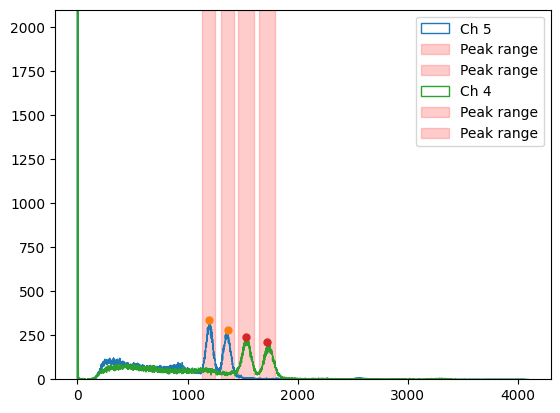

In [3]:
import matplotlib.pyplot as plt
from libra_toolbox.neutron_detection.activation_foils import compass

for detector in all_measurements["Co60_3"].detectors:
    hist, bin_edges = detector.get_energy_hist()

    plt.hist(
        bin_edges[:-1],
        bins=bin_edges,
        weights=hist,
        histtype="step",
        label=f"Ch {detector.channel_nb}",
    )
    peaks = compass.get_peaks(
        hist, source=all_measurements["Co60_3"].check_source.nuclide.name
    )
    # plt.plot(bin_edges[peaks], hist[peaks], '.', ms=10)

    from scipy.signal import find_peaks
    import numpy as np

    start_index = 400
    height = 0.60 * np.max(hist[start_index:])
    prominence = None
    width = [10, 150]
    distance = 30
    peaks, peak_data = find_peaks(
        hist[start_index:],
        prominence=prominence,
        height=height,
        width=width,
        distance=distance,
    )
    plt.plot(bin_edges[start_index:][peaks], peak_data["peak_heights"], ".", ms=10)

    for i, p in enumerate(peaks):
        width = peak_data["widths"][i]
        plt.axvspan(
            bin_edges[start_index:][p] - width,
            bin_edges[start_index:][p] + width,
            color="red",
            alpha=0.2,
            label="Peak range",
        )

plt.legend()
# plt.yscale("log")
plt.ylim(top=2100)
plt.show()

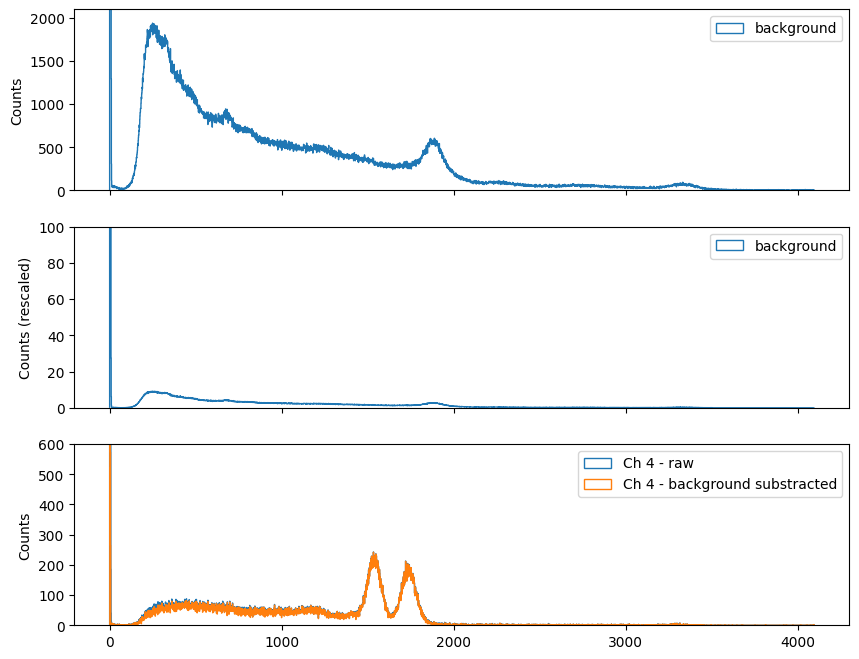

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)


plt.sca(axs[0])
hist, bin_edges = background_meas.detectors[1].get_energy_hist()

plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=hist,
    histtype="step",
    label=f"background",
)
plt.ylim(top=2100)
plt.ylabel("Counts")
plt.legend()

plt.sca(axs[1])


background_time = background_meas.detectors[1].real_count_time
bg_hist_scale = (
    hist * all_measurements["Co60_3"].detectors[1].real_count_time / background_time
)
plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=bg_hist_scale,
    histtype="step",
    label=f"background",
)
plt.ylim(top=100)
plt.ylabel("Counts (rescaled)")
plt.legend()

plt.sca(axs[2])

hist, bin_edges = all_measurements["Co60_3"].detectors[1].get_energy_hist()

plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=hist,
    histtype="step",
    label=f"Ch {detector.channel_nb} - raw",
)


background_detector = background_meas.detectors[1]

hist_background_substracted, bin_edges_bg_sub = (
    all_measurements["Co60_3"]
    .detectors[1]
    .get_energy_hist_background_substract(background_detector)
)

plt.hist(
    bin_edges_bg_sub[:-1],
    bins=bin_edges_bg_sub,
    weights=hist_background_substracted,
    histtype="step",
    label=f"Ch {detector.channel_nb} - background substracted",
)
plt.ylabel("Counts")

plt.legend()
# plt.yscale("log")
plt.ylim(bottom=0, top=600)
plt.show()

/tmp/ipykernel_979085/1088032263.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


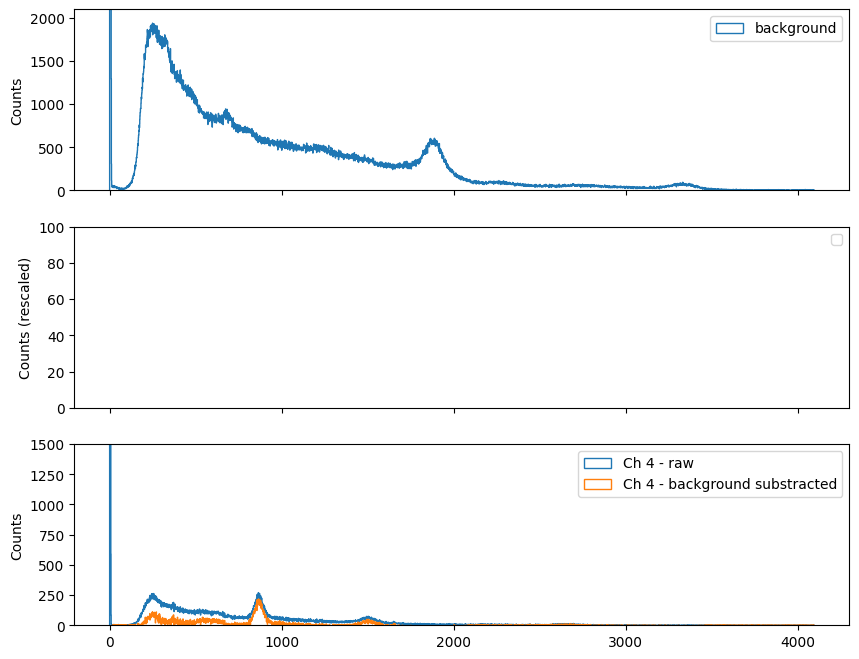

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)


plt.sca(axs[0])
hist, bin_edges = background_meas.detectors[1].get_energy_hist()

plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=hist,
    histtype="step",
    label=f"background",
)
plt.ylim(top=2100)
plt.ylabel("Counts")
plt.legend()

plt.sca(axs[1])


# background_time = background_meas.detectors[1].real_count_time
# bg_hist_scale = hist * all_measurements["Mn54_1"].detectors[1].real_count_time / background_time
# plt.hist(
#     bin_edges[:-1],
#     bins=bin_edges,
#     weights=bg_hist_scale,
#     histtype="step",
#     label=f"background",
# )
plt.ylim(top=100)
plt.ylabel("Counts (rescaled)")
plt.legend()

plt.sca(axs[2])

hist, bin_edges = all_measurements["Mn54_1"].detectors[1].get_energy_hist()

plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=hist,
    histtype="step",
    label=f"Ch {detector.channel_nb} - raw",
)


background_detector = background_meas.detectors[1]

hist_background_substracted, bin_edges_bg_sub = (
    all_measurements["Mn54_1"]
    .detectors[1]
    .get_energy_hist_background_substract(background_detector)
)

plt.hist(
    bin_edges_bg_sub[:-1],
    bins=bin_edges_bg_sub,
    weights=hist_background_substracted,
    histtype="step",
    label=f"Ch {detector.channel_nb} - background substracted",
)
plt.ylabel("Counts")

plt.legend()
# plt.yscale("log")
plt.ylim(bottom=0, top=1500)
plt.show()

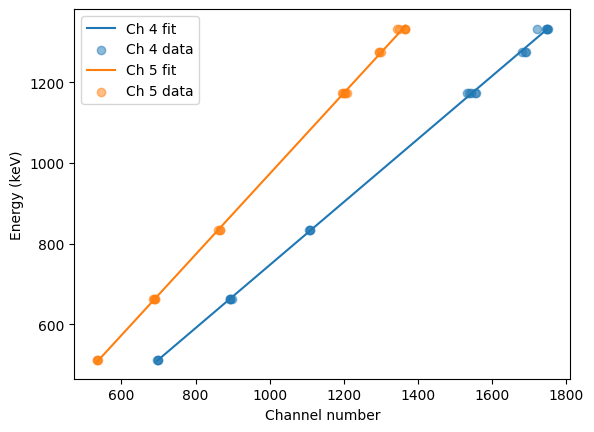

In [6]:
calibration_coeffs = {}

for channel_nb in [4, 5]:
    calibration_channels, calibration_energies = compass.get_calibration_data(
        all_measurements,
        background_measurement=background_meas,
        channel_nb=channel_nb,
    )

    coeff = np.polyfit(calibration_channels, calibration_energies, 1)
    calibration_coeffs[channel_nb] = coeff

    xs = np.linspace(
        calibration_channels[0],
        calibration_channels[-1],
    )
    plt.plot(
        xs,
        np.polyval(coeff, xs),
        label=f"Ch {channel_nb} fit",
    )
    plt.scatter(
        calibration_channels,
        calibration_energies,
        label=f"Ch {channel_nb} data",
        alpha=0.5,
    )
plt.xlabel("Channel number")
plt.ylabel("Energy (keV)")
plt.legend()
plt.show()

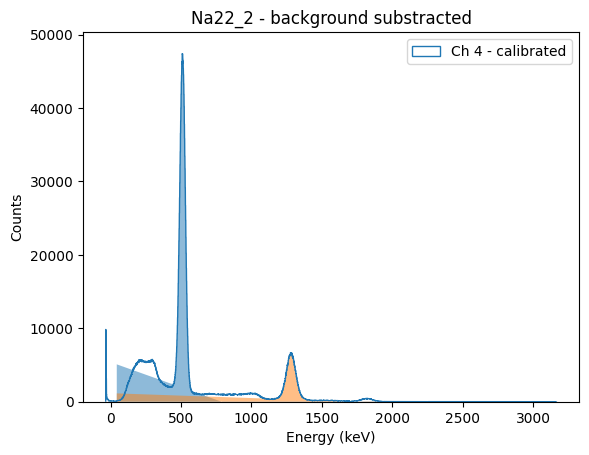

In [11]:
ch_nb = 4
meas_name = "Na22_2"

background_detector = background_meas.detectors[1]
check_source_detector = all_measurements[meas_name].detectors[0]

assert background_detector.channel_nb == check_source_detector.channel_nb
assert (
    background_detector.channel_nb == ch_nb
), f"Channel number mismatch: {background_detector.channel_nb} != {ch_nb}"

hist, bin_edges = check_source_detector.get_energy_hist_background_substract(
    # background_detector, bins="double"
    # background_detector, bins=int(np.nanmax(check_source_detector.events[:, 1]))
    background_detector,
    bins=None,
)

calibrated_bin_bedges = np.polyval(calibration_coeffs[ch_nb], bin_edges)

xvals = np.diff(calibrated_bin_bedges) / 2 + calibrated_bin_bedges[:-1]

for energy_peak in all_measurements[meas_name].check_source.nuclide.energy:

    parameters, covariance = compass.fit_peak_gauss(
        hist, xvals, [energy_peak], search_width=400
    )

    # plotting

    peak_start = 100
    peak_end = 3000
    plt.fill_between(
        xvals[peak_start:peak_end],
        compass.gauss(xvals[peak_start:peak_end], *parameters),
        alpha=0.5,
    )

plt.hist(
    calibrated_bin_bedges[:-1],
    bins=calibrated_bin_bedges,
    weights=hist,
    histtype="step",
    label=f"Ch {detector.channel_nb} - calibrated",
)
plt.ylabel("Counts")
plt.title(f"{meas_name} - background substracted")
plt.legend()
plt.xlabel("Energy (keV)")
plt.ylim(bottom=0)
plt.show()

In [8]:
efficiency = all_measurements["Na22_2"].compute_detection_efficiency(
    background_measurement=background_meas,
    calibration_coeffs=calibration_coeffs[5],
    channel_nb=5,
    search_width=300,
)

print(f"Detection efficiency: {efficiency}")

Detection efficiency: [0.02615625 0.01333559]


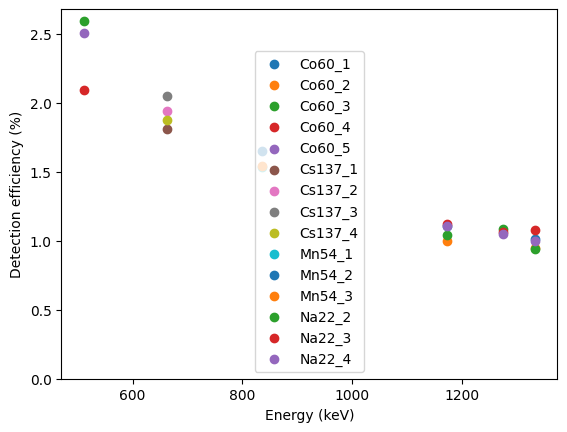

In [9]:
channel_nb = 4
for name, measurement in all_measurements.items():
    efficiency = measurement.compute_detection_efficiency(
        background_measurement=background_meas,
        calibration_coeffs=calibration_coeffs[channel_nb],
        channel_nb=channel_nb,
        search_width=300,
    )
    plt.scatter(
        measurement.check_source.nuclide.energy,
        efficiency * 100,
        label=name,
    )
plt.xlabel("Energy (keV)")
plt.ylabel("Detection efficiency (%)")
plt.legend()
plt.ylim(bottom=0)
plt.show()

In [10]:
sample_measurements_directories = {
    "niobium_1": f"{run_dir}/Niobium_250318_1253_count1/UNFILTERED",
    "niobium_2": f"{run_dir}/Niobium_250319_1124_count2/UNFILTERED",
    "niobium_3": f"{run_dir}/Niobium_250321_0935_count3/UNFILTERED",
    "zirconium_1": f"{run_dir}/Zirconium_1L_3_240317_2312/UNFILTERED",
    "zirconium_2": f"{run_dir}/Zirconium_250318_2219_count2/UNFILTERED",
    "zirconium_3": f"{run_dir}/Zirconium_250320_1042_count3/UNFILTERED",
}

all_sample_measurements = {}

for sample, directory in sample_measurements_directories.items():
    print(f"Processing {sample}...")
    meas = Measurement.from_directory(directory, name=sample)
    print(meas)
    all_sample_measurements[sample] = meas

Processing niobium_1...
Processing niobium_2...
Processing niobium_3...
Processing zirconium_1...
Processing zirconium_2...
Processing zirconium_3...
